<a href="https://colab.research.google.com/github/AbdurRahmaneee/machine_learning_projects/blob/main/Multiphase_submodel_2_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing file
df = pd.read_excel("pred_df.xlsx")
df

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct,PT131 [mbar],PDT120 [mbar],PDT121 [mbar]
0,b'/content/dataset_2/test/annular/17.png',0,0,0.569496,annular,annular,True,49.43530,23.16120,12.41920
1,b'/content/dataset_2/test/annular/20.png',0,0,0.457835,annular,annular,True,19.62260,9.87799,5.70991
2,b'/content/dataset_2/test/annular/21.png',0,0,0.806125,annular,annular,True,30.28990,11.68000,7.43477
3,b'/content/dataset_2/test/annular/22.png',0,0,0.594965,annular,annular,True,22.76580,9.45925,6.07616
4,b'/content/dataset_2/test/annular/51.png',0,0,0.611956,annular,annular,True,24.60420,10.22680,6.39396
5,b'/content/dataset_2/test/annular/56.png',0,4,0.440638,annular,wavy,False,53.37110,21.03130,12.02970
6,b'/content/dataset_2/test/annular/7.png',0,0,0.562234,annular,annular,True,35.21786,16.21857,10.32126
7,b'/content/dataset_2/test/plug/29b.png',1,1,0.715026,plug,plug,True,7.34950,3.60246,2.53466
8,b'/content/dataset_2/test/slug/14.png',2,2,0.552420,slug,slug,True,21.07120,11.29780,6.84837
9,b'/content/dataset_2/test/slug/15.png',2,2,0.359319,slug,slug,True,21.10600,10.97790,6.67627


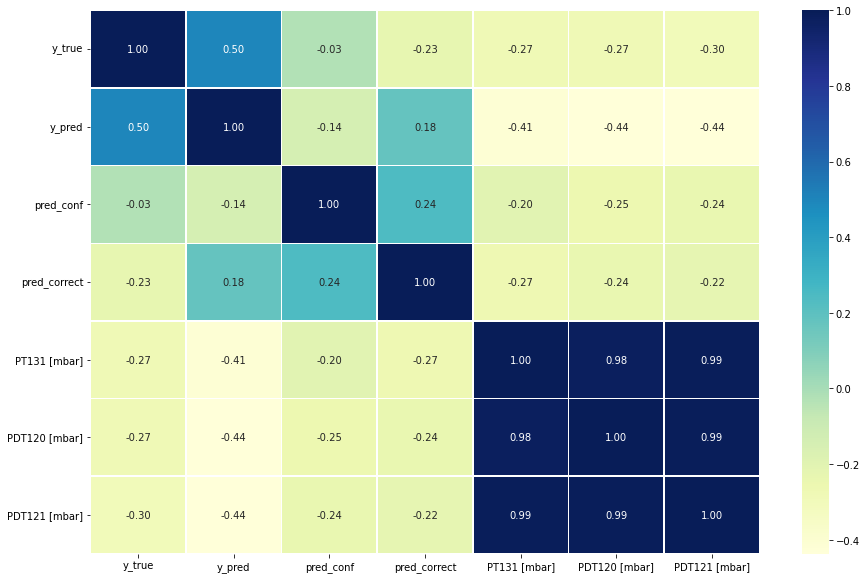

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
plt.yticks(rotation=0);

In [ ]:
df.describe()

,y_true,y_pred,pred_conf,PT131 [mbar],PDT120 [mbar],PDT121 [mbar]
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.533333,2.133333,0.582801,19.531233,8.502484,5.218257
std,1.591645,1.736690,0.140837,17.962405,8.021114,4.309386
min,0.000000,0.000000,0.333707,3.517480,1.035290,1.031700
25%,1.250000,0.000000,0.490506,5.575592,2.039487,1.767020
50%,3.000000,3.000000,0.565865,9.699630,4.311625,3.023155
75%,4.000000,4.000000,0.693568,28.439825,11.584450,7.288170
max,4.000000,4.000000,0.867746,65.292800,28.963000,16.362700


In [ ]:
df.dtypes

img_path             object
y_true                int64
y_pred                int64
pred_conf           float64
y_true_classname     object
y_pred_classname     object
pred_correct           bool
PT131 [mbar]        float64
PDT120 [mbar]       float64
PDT121 [mbar]       float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['y_true_classname_Cat'] = labelencoder.fit_transform(df['y_true_classname'])
df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct,PT131 [mbar],PDT120 [mbar],PDT121 [mbar],y_true_classname_Cat
0,b'/content/dataset_2/test/annular/17.png',0,0,0.569496,annular,annular,True,49.4353,23.16120,12.41920,0
1,b'/content/dataset_2/test/annular/20.png',0,0,0.457835,annular,annular,True,19.6226,9.87799,5.70991,0
2,b'/content/dataset_2/test/annular/21.png',0,0,0.806125,annular,annular,True,30.2899,11.68000,7.43477,0
3,b'/content/dataset_2/test/annular/22.png',0,0,0.594965,annular,annular,True,22.7658,9.45925,6.07616,0
4,b'/content/dataset_2/test/annular/51.png',0,0,0.611956,annular,annular,True,24.6042,10.22680,6.39396,0


<span style="color:red">**I think it would be nice to keep "PDT120 [mbar]", "PDT121 [mbar]...**</span>

In [ ]:
#df.drop(["img_path", "y_true_classname", "y_true", "PDT120 [mbar]", "PDT121 [mbar]"], axis=1, inplace=True)

############################# update:  to keep "PDT120 [mbar]", "PDT121 [mbar]" ###########
df.drop(["img_path", "y_true_classname", "y_true"], axis=1, inplace=True) 
############################ update end ###################################################
df

,y_pred,pred_conf,y_pred_classname,pred_correct,PT131 [mbar],PDT120 [mbar],PDT121 [mbar],y_true_classname_Cat
0,0,0.569496,annular,True,49.43530,23.16120,12.41920,0
1,0,0.457835,annular,True,19.62260,9.87799,5.70991,0
2,0,0.806125,annular,True,30.28990,11.68000,7.43477,0
3,0,0.594965,annular,True,22.76580,9.45925,6.07616,0
4,0,0.611956,annular,True,24.60420,10.22680,6.39396,0
5,4,0.440638,wavy,False,53.37110,21.03130,12.02970,0
6,0,0.562234,annular,True,35.21786,16.21857,10.32126,0
7,1,0.715026,plug,True,7.34950,3.60246,2.53466,1
8,2,0.552420,slug,True,21.07120,11.29780,6.84837,2
9,2,0.359319,slug,True,21.10600,10.97790,6.67627,2


In [ ]:
# Import Pipeline from sklearn's pipeline module
from sklearn.pipeline import Pipeline

# Import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer

# Import OneHotEncoder from sklearn's preprocessing module
from sklearn.preprocessing import OneHotEncoder

# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

In [ ]:
# Define different categorical features 
categorical_feature = ["y_pred_classname"]

# Create categorical transformer Pipeline
categorical_transformer = Pipeline(steps=[
    # Set OneHotEncoder to ignore the unknowns
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

In [ ]:
# Setup preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        # Use the categorical_transformer to transform the categorical_features
        ("cat", categorical_transformer, categorical_feature)])

In [ ]:
# Import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

In [ ]:
# Define different categorical features 
categorical_feature = ["y_pred_classname"]

# Create categorical transformer Pipeline
categorical_transformer = Pipeline(steps=[
    # Set OneHotEncoder to ignore the unknowns
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])
# Setup preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        # Use the categorical_transformer to transform the categorical_features
        ("cat", categorical_transformer, categorical_feature)])

In [ ]:
# Creating dictionary of model instances
models = { "LinearSVC": LinearSVC(),
    ""
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier()
}

# Create an empty dictionary
results = {}

<span style="color:red">**why keep "pred_correct"?  
    And "y_pred_classname" need to be have label encode also...**</span>
    
<span style="color:red">**In the whole dataset df,  there is only one sample for the "plug", see row #7). If so, it not necessary to keep it.**</span>


<span style="color:red">**Similar as "slug", there are just two samples. It is difficult while splitting data.**</span>

<span style="color:red">**Normalization is also important for many models.**</span>

In [ ]:
# Create X data
#X = df.drop("y_true_classname_Cat", axis=1)   ### why keep "pred_correct"?  and "y_pred_classname" need to be encoded also
#print(X)

############################ update: feature engineering & normalization ###############
dff = df.copy()
dff = dff.drop([7])  # row #7, there is only have one sample for the "plug". If so, it not necessary to keep it.
# dff = dff.drop([7, 8, 9]) # row 7, 8 and 9 dropped not enough samples for slug and plug
# create some new features to replace PDT measurements.  NOTE: flow is dynamic, pressure is always changing, 
#    if you are using a constent value, it may become a challenge. 
dff["PDT120/PT131_new"] = df["PDT120 [mbar]"]/df["PT131 [mbar]"]
dff["(PDT121-120)/PDT120_new"] = abs(df["PDT120 [mbar]"]-df["PDT121 [mbar]"])/df["PDT120 [mbar]"]
  
X = dff.drop(["y_true_classname_Cat", "y_pred_classname", "pred_correct", "PDT120 [mbar]","PDT121 [mbar]", "pred_conf"], axis=1) 
X = (X-X.min())/(X.max()-X.min())  # min-max normalization
############################ update: end ###############################################


y = dff["y_true_classname_Cat"]

print(X.shape)
print(y.shape)
print(X.head(2))


(29, 4)
(29,)
   y_pred  PT131 [mbar]  PDT120/PT131_new  (PDT121-120)/PDT120_new
0     0.0      0.743304          0.485009                 0.823032
1     0.0      0.260705          0.582095                 0.747237


In [ ]:
dff

,y_pred,pred_conf,y_pred_classname,pred_correct,PT131 [mbar],PDT120 [mbar],PDT121 [mbar],y_true_classname_Cat,PDT120/PT131_new,(PDT121-120)/PDT120_new
0,0,0.569496,annular,True,49.43530,23.16120,12.41920,0,0.468515,0.463793
1,0,0.457835,annular,True,19.62260,9.87799,5.70991,0,0.503399,0.421956
2,0,0.806125,annular,True,30.28990,11.68000,7.43477,0,0.385607,0.363461
3,0,0.594965,annular,True,22.76580,9.45925,6.07616,0,0.415503,0.357649
4,0,0.611956,annular,True,24.60420,10.22680,6.39396,0,0.415653,0.374784
5,4,0.440638,wavy,False,53.37110,21.03130,12.02970,0,0.394058,0.428010
6,0,0.562234,annular,True,35.21786,16.21857,10.32126,0,0.460521,0.363615
8,2,0.552420,slug,True,21.07120,11.29780,6.84837,2,0.536173,0.393832
9,2,0.359319,slug,True,21.10600,10.97790,6.67627,2,0.520132,0.391845
10,4,0.374451,wavy,False,5.56928,2.68258,1.87754,3,0.481674,0.300099


<span style="color:red">**Test size only have 0.1? a bit less..**</span>

<span style="color:red">**Upsampling training dataset**</span>

In [ ]:
# split into train and test
X_train_ori, X_test, y_train_ori, y_test = train_test_split(X,
                                                            y,
                                                            test_size=.3,
                                                            random_state=40)
print("original_training data size:")
print(X_train_ori.shape)
print(y_train_ori.shape)

############################## Update:  Upsampling training dataset  #######################
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=10, k_neighbors=1)
X_train, y_train = sm.fit_resample(X_train_ori, y_train_ori)


print("upsampled_ training data size:")
print(X_train.shape)
print(y_train.shape)
############################# Update: end ##################################################

print("\n Test dataset:")
print(X_test)
print(y_test)

original_training data size:
(20, 4)
(20,)
upsampled_ training data size:
(32, 4)
(32,)

 Test dataset:
    y_pred  PT131 [mbar]  PDT120/PT131_new  (PDT121-120)/PDT120_new
2     0.00      0.433384          0.254261                 0.641264
17    0.75      0.015405          0.026636                 0.042937
20    1.00      0.068224          0.257171                 0.294639
15    1.00      0.052037          0.096075                 0.247055
16    0.75      0.003899          0.184568                 0.104420
14    0.75      0.000015          0.000000                 0.133440
21    1.00      0.114010          0.445560                 0.564126
3     0.00      0.311586          0.337466                 0.630733
29    1.00      0.033623          0.166834                 0.212610
2     0
17    3
20    4
15    3
16    3
14    3
21    4
3     0
29    4
Name: y_true_classname_Cat, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix
# Loop through the items in the regression_models dictionary
for model_name, model in models.items():

    # Create a model pipeline with a preprocessor step and model step
    model_pipeline = Pipeline(steps=[
        #("preprocessor", preprocessor),
        ("model", model)
    ])

    # Fit the model pipeline to the car sales training data
    print(f"Fitting {model_name}...")
    model_pipeline.fit(X_train, y_train)

    # Score the model pipeline on the test data appending the model_name to the
    # results dictionary
    print(f"Scoring {model_name}...")
    results[model_name] = model_pipeline.score(X_test, y_test)
    
    ################ update:  creating a confusion matrix  ##################
    model_predictions=model_pipeline.predict(X_test)
    cm = confusion_matrix(y_test, model_predictions)
    print(cm)
    ################################# update: end ############################
print(results)
                                               
                                               

Fitting LinearSVC...
Scoring LinearSVC...
[[2 0 0 0]
 [0 0 0 0]
 [0 0 4 0]
 [0 1 2 0]]
Fitting KNN...
Scoring KNN...
[[2 0 0]
 [0 4 0]
 [0 1 2]]
Fitting SVC...
Scoring SVC...
[[2 0 0]
 [0 3 1]
 [0 0 3]]
Fitting LogisticRegression...
Scoring LogisticRegression...
[[2 0 0 0]
 [0 0 0 0]
 [0 0 4 0]
 [0 1 2 0]]
Fitting RandomForestClassifier...
Scoring RandomForestClassifier...
[[0 0 2]
 [0 3 1]
 [0 1 2]]
{'LinearSVC': 0.6666666666666666, 'KNN': 0.8888888888888888, 'SVC': 0.8888888888888888, 'LogisticRegression': 0.6666666666666666, 'RandomForestClassifier': 0.5555555555555556}


<span style="color:red">**Using voting**</span>

In [ ]:
#################### Update: Using voting  ###############################################
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ("LogisticRegression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
#     ("SVC", SVC(probability=True)),
    ("RandomForestClassifier", RandomForestClassifier(random_state=42)),
], voting='soft')

voting_clf.fit(X_train, y_train)

print("score: ", voting_clf.score(X_test, y_test))

################ creating a confusion matrix
model_predictions=voting_clf.predict(X_test)
cm_vote= confusion_matrix(y_test, model_predictions)
print(cm_vote)

################################# Update: end #############################################

score:  0.8888888888888888
[[2 0 0]
 [0 4 0]
 [0 1 2]]


In [ ]:
y_test

2     0
17    3
20    4
15    3
16    3
14    3
21    4
3     0
29    4
Name: y_true_classname_Cat, dtype: int64

In [ ]:
model_predictions

array([0, 3, 4, 3, 3, 3, 4, 0, 3])

In [ ]:
# Create a confusion metrics

import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):


  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)


  # Set labels to be claseses
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
class_names = ['annular', 'plug', 'slug', 'stratified', 'wavy']
class_names

['annular', 'plug', 'slug', 'stratified', 'wavy']

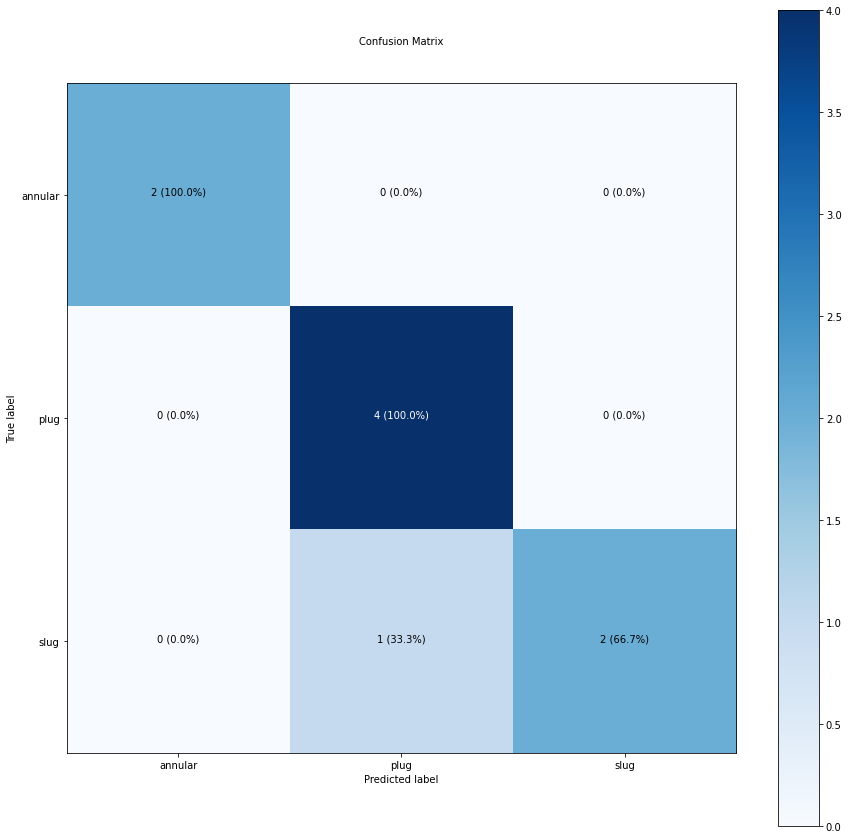

In [ ]:
# confusion matrix
make_confusion_matrix(y_true=y_test,
                      y_pred=model_predictions,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
# # Correlation matrix
# corr_matrix = X_train.corr()

# fig, ax = plt.subplots(figsize=(10, 10))
# ax = sns.heatmap(corr_matrix,
#                 annot=True,
#                 linewidths=0.5,
#                 fmt=".2f",
#                 cmap="YlGnBu");
# plt.yticks(rotation=0);

# Conditional part for slug plug double check

In [ ]:
# import library
import pandas as pd
# importing file
df = pd.read_excel("slug_plug_df.xlsx")
df

,y_pred_classname,PT131 [mbar],PDT120 [mbar],PDT121 [mbar]
0,plug,7.3495,3.60246,2.53466
1,slug,21.0712,11.29780,6.84837
2,slug,21.1060,10.97790,6.67627


In [ ]:
for i in df.index:
  # print(df["PT131 [mbar]"][i])
  if df["PT131 [mbar]"][i] > 20.:
    print(f"Number {i} is slug")
  elif df["PDT120 [mbar]"][i] > 5 and df["PDT120 [mbar]"][i] < 10:
    print(f"Number {i} is slug")
  else:
    print(f"Number {i} is plug")

Number 0 is plug
Number 1 is slug
Number 2 is slug
